Dwse Prwth mera: 1
Dwse Teleutaia mera: 355


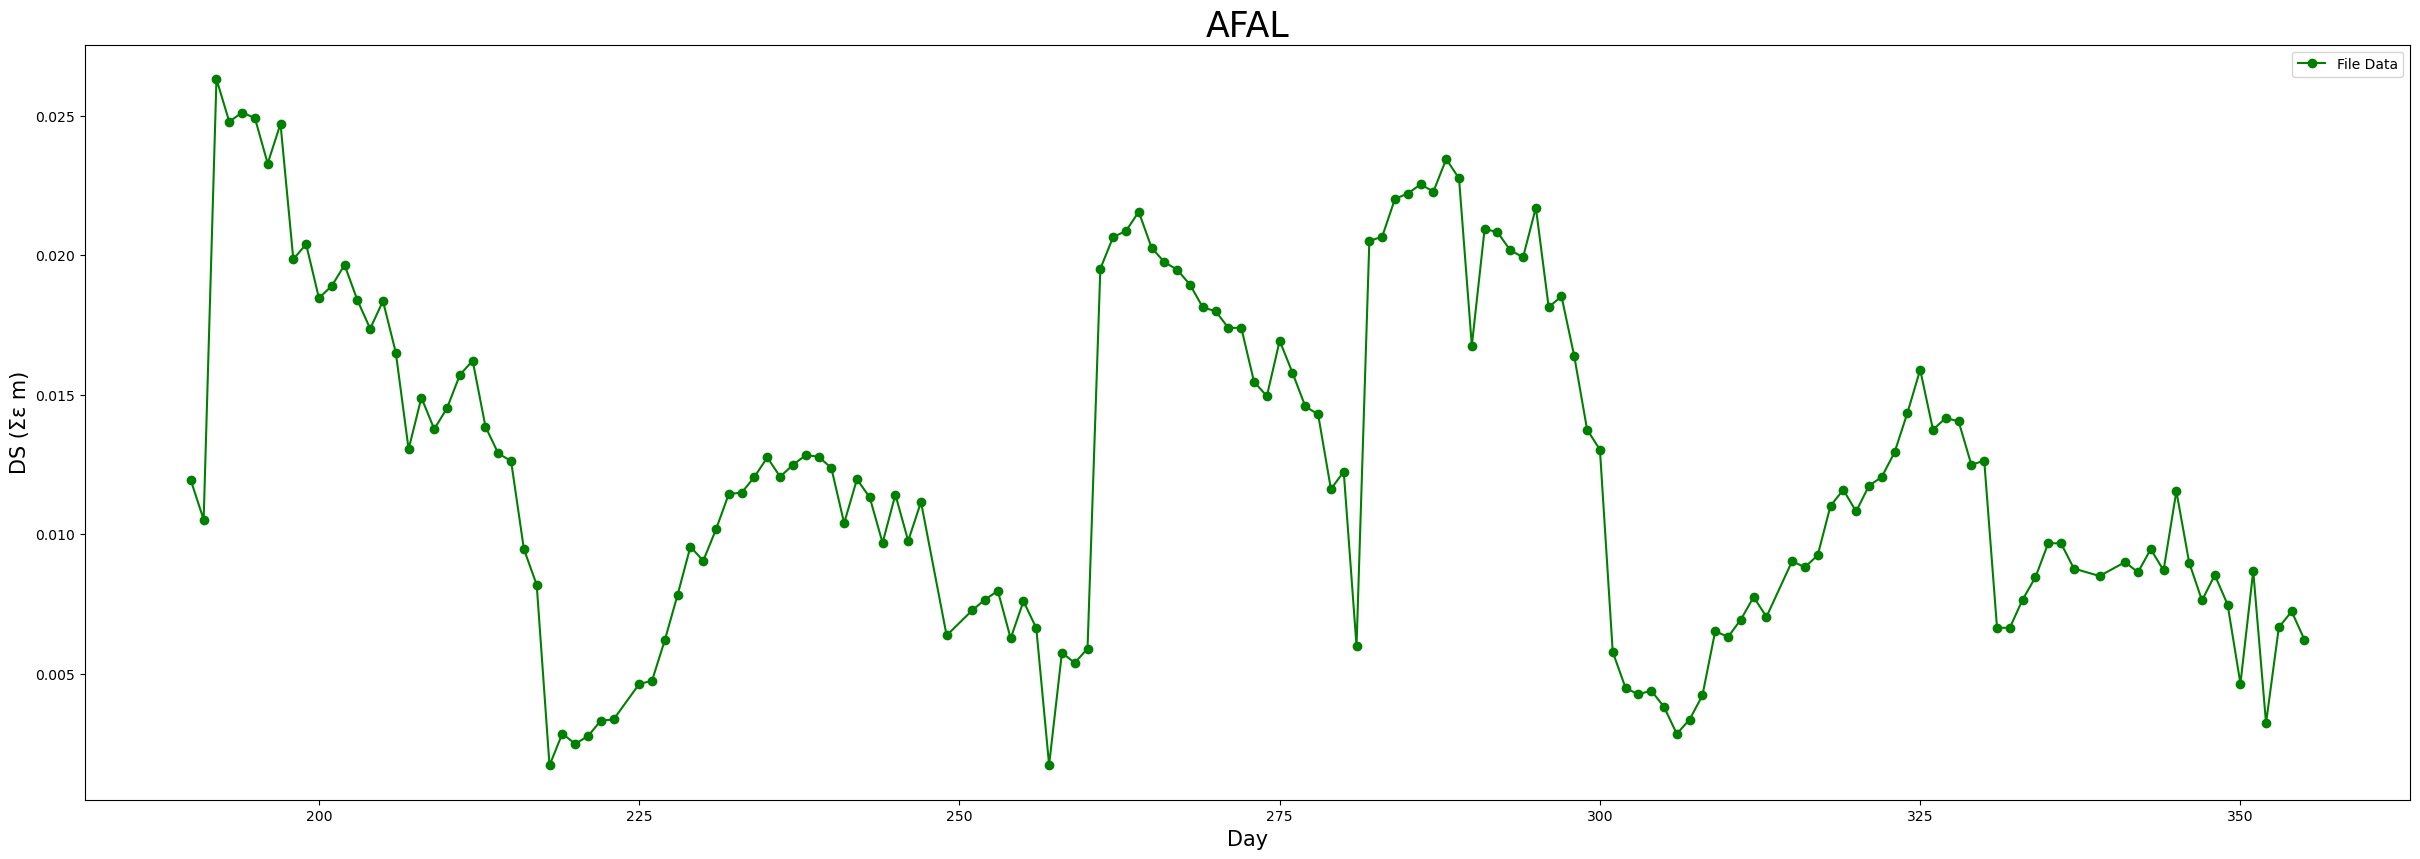

In [11]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from array import *


#year = int(input('Dwse Etos: '))
first_day = int(input('Dwse Prwth mera: '))
last_day = int(input('Dwse Teleutaia mera: '))

if(first_day <= 9):
    path = f'2022_CRD/W42200{first_day}L.CRD'
elif(first_day <= 99):
    path = f'2022_CRD/W4220{first_day}L.CRD'
else:
    path = f'2022_CRD/W422{first_day}L.CRD'

df = pd.read_fwf(path, skiprows=4, skipfooter=5) #ΕΔΩ ΤΟΠΟΘΕΤΗΣΤΕ ΤΟ ΣΩΣΤΟ PATH
        
StationName1 = []
StationName1 = df[df.columns[1]] 

X1 = []
Y1 = []
Z1 = []

X2 = []
Y2 = []
Z2 = []

AFAL = []
MANO = []
SANT = []
SAWI = []

AFALX = []
AFALY = []
AFALZ = []

MANOX = []
MANOY = []
MANOZ = []

SANTX = []
SANTY = []
SANTZ = []

SAWIX = []
SAWIY = []
SAWIZ = []


DateMiss = []
Dates = []

#307,121
for i in range(last_day,first_day,-1):
    
    #path1 = f'{year}/W421{i}L.CRD'
    #path2 = f'{year}/W421{i-90}L.CRD'
    
    if(i <= 9):
        #path = f'home/gnss/GPSDATA/MET_BCKP/CAMP/{year}/{first_day}/CRD/W42200{first_day}L.CRD'
        path1 = f'2022_CRD/W42200{i}L.CRD'
        path2 = f'2022_CRD/W42200{i-90}L.CRD'
    elif(i <= 99):
        path1 = f'2022_CRD/W4220{i}L.CRD'
        path2 = f'2022_CRD/W4220{i-90}L.CRD'
    else:
        path1 = f'2022_CRD/W422{i}L.CRD'
        path2 = f'2022_CRD/W422{i-90}L.CRD'
     
    
    if((i == first_day+90) or (last_day < first_day+90)):
        break
        
    isFile1 = os.path.isfile(path1)
    isFile2 = os.path.isfile(path2)
    if(isFile1 == False):
        DateMiss.append(i)
    else:
        if(isFile2 == True):
            Dates.append(i)
            df1 = pd.read_fwf(path1, skiprows=4, skipfooter=5) #ΕΔΩ ΤΟΠΟΘΕΤΗΣΤΕ ΤΟ ΣΩΣΤΟ PATH - ΠΡΟΣΟΧΗ
            
            df2 = pd.read_fwf(path2, skiprows=4, skipfooter=5) #ΕΔΩ ΤΟΠΟΘΕΤΗΣΤΕ ΤΟ ΣΩΣΤΟ PATH - ΠΡΟΣΟΧΗ
        
            X1 = df1[df1.columns[2]] 
            Y1 = df1[df1.columns[3]] 
            Z1 = df1[df1.columns[4]] 
    
            X2 = df2[df2.columns[2]] 
            Y2 = df2[df2.columns[3]] 
            Z2 = df2[df2.columns[4]]

            for j in range (0,len(StationName1)):
                if(StationName1[j] == 'AFAL XXXXXXXXX'):
                    AFAL.append(math.sqrt((X2[j] - X1[j])**2+(Y2[j] - Y1[j])**2+(Z2[j] - Z1[j])**2))
                    AFALX.append(X2[j] - X1[j])
                    AFALY.append(Y2[j] - Y1[j])
                    AFALZ.append(Z2[j] - Z1[j])
                elif (StationName1[j] == 'MANO XXXXXXXXX'):
                    MANO.append(math.sqrt((X2[j] - X1[j])**2+(Y2[j] - Y1[j])**2+(Z2[j] - Z1[j])**2))
                    MANOX.append(X2[j] - X1[j])
                    MANOY.append(Y2[j] - Y1[j])
                    MANOZ.append(Z2[j] - Z1[j])
                elif (StationName1[j] == 'SANT XXXXXXXXX'):
                    SANT.append(math.sqrt((X2[j] - X1[j])**2+(Y2[j] - Y1[j])**2+(Z2[j] - Z1[j])**2))
                    SANTX.append(X2[j] - X1[j])
                    SANTY.append(Y2[j] - Y1[j])
                    SANTZ.append(Z2[j] - Z1[j])
                elif (StationName1[j] == 'SAWI XXXXXXXXX'):
                    SAWI.append(math.sqrt((X2[j] - X1[j])**2+(Y2[j] - Y1[j])**2+(Z2[j] - Z1[j])**2))
                    SAWIX.append(X2[j] - X1[j])
                    SAWIY.append(Y2[j] - Y1[j])
                    SAWIZ.append(Z2[j] - Z1[j])
            
            
AFAL_COORDS = [25.3892295548,36.4608680428,196.1581]
MANO_COORDS = [25.3454148891,36.4356115948,205.9502]
SANT_COORDS = [25.4226156021,36.4335959289,392.0033]
SAWI_COORDS = [25.4370720969,36.3871092752,341.8376]

t_AFAL = []
DEast_AFAL = []
DUp_AFAL = []
DNorth_AFAL = []

lat0_AFAL = math.radians(AFAL_COORDS[1])
lon0_AFAL = math.radians(AFAL_COORDS[0])

for i in range(0,len(AFALX)):
    t_AFAL.append(math.cos(lon0_AFAL) * AFALX[i] + math.sin(lon0_AFAL) * AFALY[i])
    DEast_AFAL.append(-math.sin(lon0_AFAL) * AFALX[i] + math.cos(lon0_AFAL) * AFALY[i])

    DUp_AFAL.append(math.cos(lat0_AFAL) * t_AFAL[i] + math.sin(lat0_AFAL) * AFALZ[i])
    DNorth_AFAL.append(-math.sin(lat0_AFAL) * t_AFAL[i] + math.cos(lat0_AFAL) * AFALZ[i])      

    
t_MANO = []
DEast_MANO = []
DUp_MANO = []
DNorth_MANO = []

lat0_MANO = math.radians(MANO_COORDS[1])
lon0_MANO = math.radians(MANO_COORDS[0])

for i in range(0,len(MANOX)):
    t_MANO.append(math.cos(lon0_MANO) * MANOX[i] + math.sin(lon0_MANO) * MANOY[i])
    DEast_MANO.append(-math.sin(lon0_MANO) * MANOX[i] + math.cos(lon0_MANO) * MANOY[i])

    DUp_MANO.append(math.cos(lat0_MANO) * t_MANO[i] + math.sin(lat0_MANO) * MANOZ[i])
    DNorth_MANO.append(-math.sin(lat0_MANO) * t_MANO[i] + math.cos(lat0_MANO) * MANOZ[i])  
    

t_SANT = []
DEast_SANT = []
DUp_SANT = []
DNorth_SANT = []

lat0_SANT = math.radians(SANT_COORDS[1])
lon0_SANT = math.radians(SANT_COORDS[0])

for i in range(0,len(SANTX)):
    t_SANT.append(math.cos(lon0_SANT) * SANTX[i] + math.sin(lon0_SANT) * SANTY[i])
    DEast_SANT.append(-math.sin(lon0_SANT) * SANTX[i] + math.cos(lon0_SANT) * SANTY[i])

    DUp_SANT.append(math.cos(lat0_SANT) * t_SANT[i] + math.sin(lat0_SANT) * SANTZ[i])
    DNorth_SANT.append(-math.sin(lat0_SANT) * t_SANT[i] + math.cos(lat0_SANT) * SANTZ[i])   

    
t_SAWI = []
DEast_SAWI = []
DUp_SAWI = []
DNorth_SAWI = []

lat0_SAWI = math.radians(SAWI_COORDS[1])
lon0_SAWI = math.radians(SAWI_COORDS[0])

for i in range(0,len(SAWIX)):
    t_SAWI.append(math.cos(lon0_SAWI) * SAWIX[i] + math.sin(lon0_SAWI) * SAWIY[i])
    DEast_SAWI.append(-math.sin(lon0_SAWI) * SAWIX[i] + math.cos(lon0_SAWI) * SAWIY[i])

    DUp_SAWI.append(math.cos(lat0_SAWI) * t_SAWI[i] + math.sin(lat0_SAWI) * SAWIZ[i])
    DNorth_SAWI.append(-math.sin(lat0_SAWI) * t_SAWI[i] + math.cos(lat0_SAWI) * SAWIZ[i])
    
    
    
"""       
Date = [] 
with open("DateB90.txt", "r") as f:
    date = f.readlines()

Date=date
Date2 = np.arange(len(Date))
"""   

figure(figsize=(30, 10), dpi=100)
# plotting the points
plt.plot(Dates, AFAL, 'go-', label = 'File Data')
 
# naming the x axis
plt.xlabel('Day', fontsize = 15)
# naming the y axis
plt.ylabel('DS (Σε m)', fontsize = 15)
# giving a title to my graph
plt.title('AFAL' , fontsize = 25)

#plt.xticks(Date2, Date)

plt.legend()
 
# function to show the plot
plt.show()


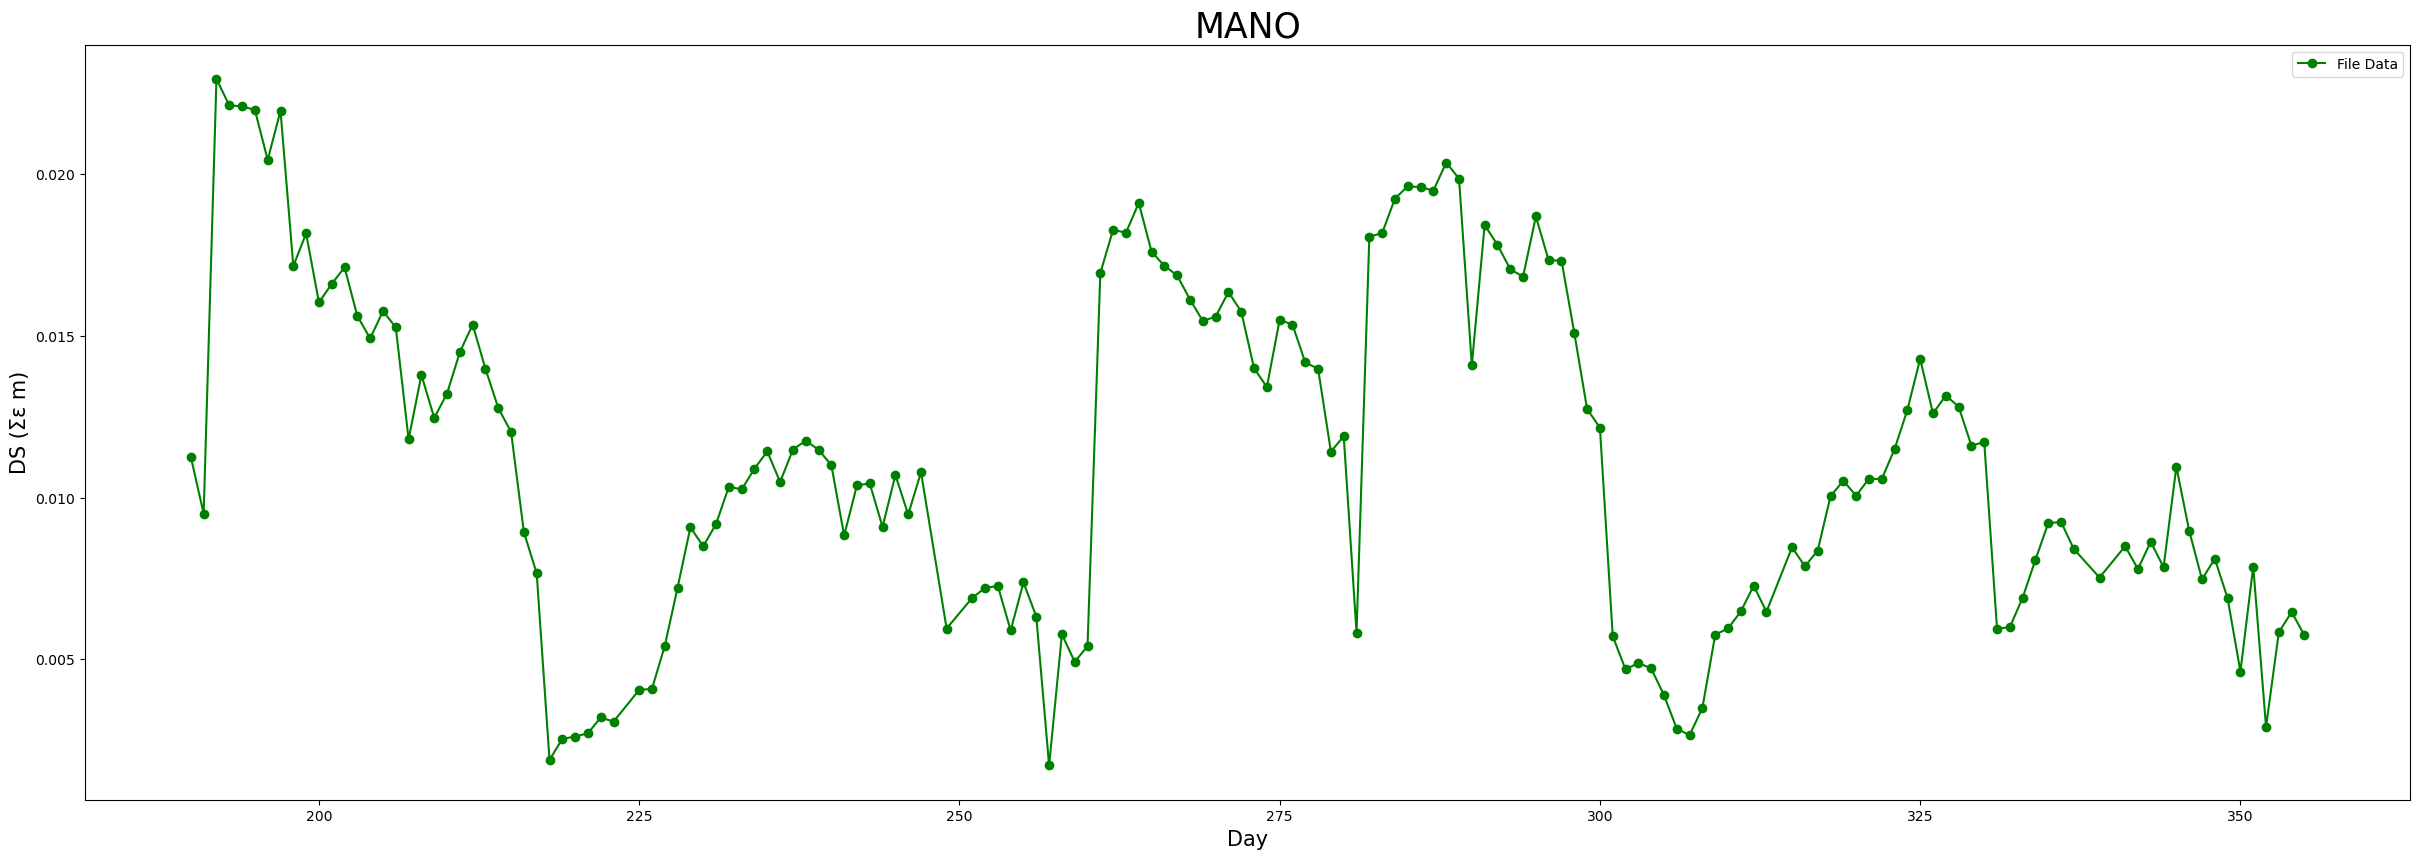

In [12]:
figure(figsize=(30, 10), dpi=100)
# plotting the points
plt.plot(Dates, MANO, 'go-', label = 'File Data')
 
# naming the x axis
plt.xlabel('Day', fontsize = 15)
# naming the y axis
plt.ylabel('DS (Σε m)', fontsize = 15)
# giving a title to my graph
plt.title('MANO' , fontsize = 25)

#plt.xticks(Date2, Date)

plt.legend()
 
# function to show the plot
plt.show()

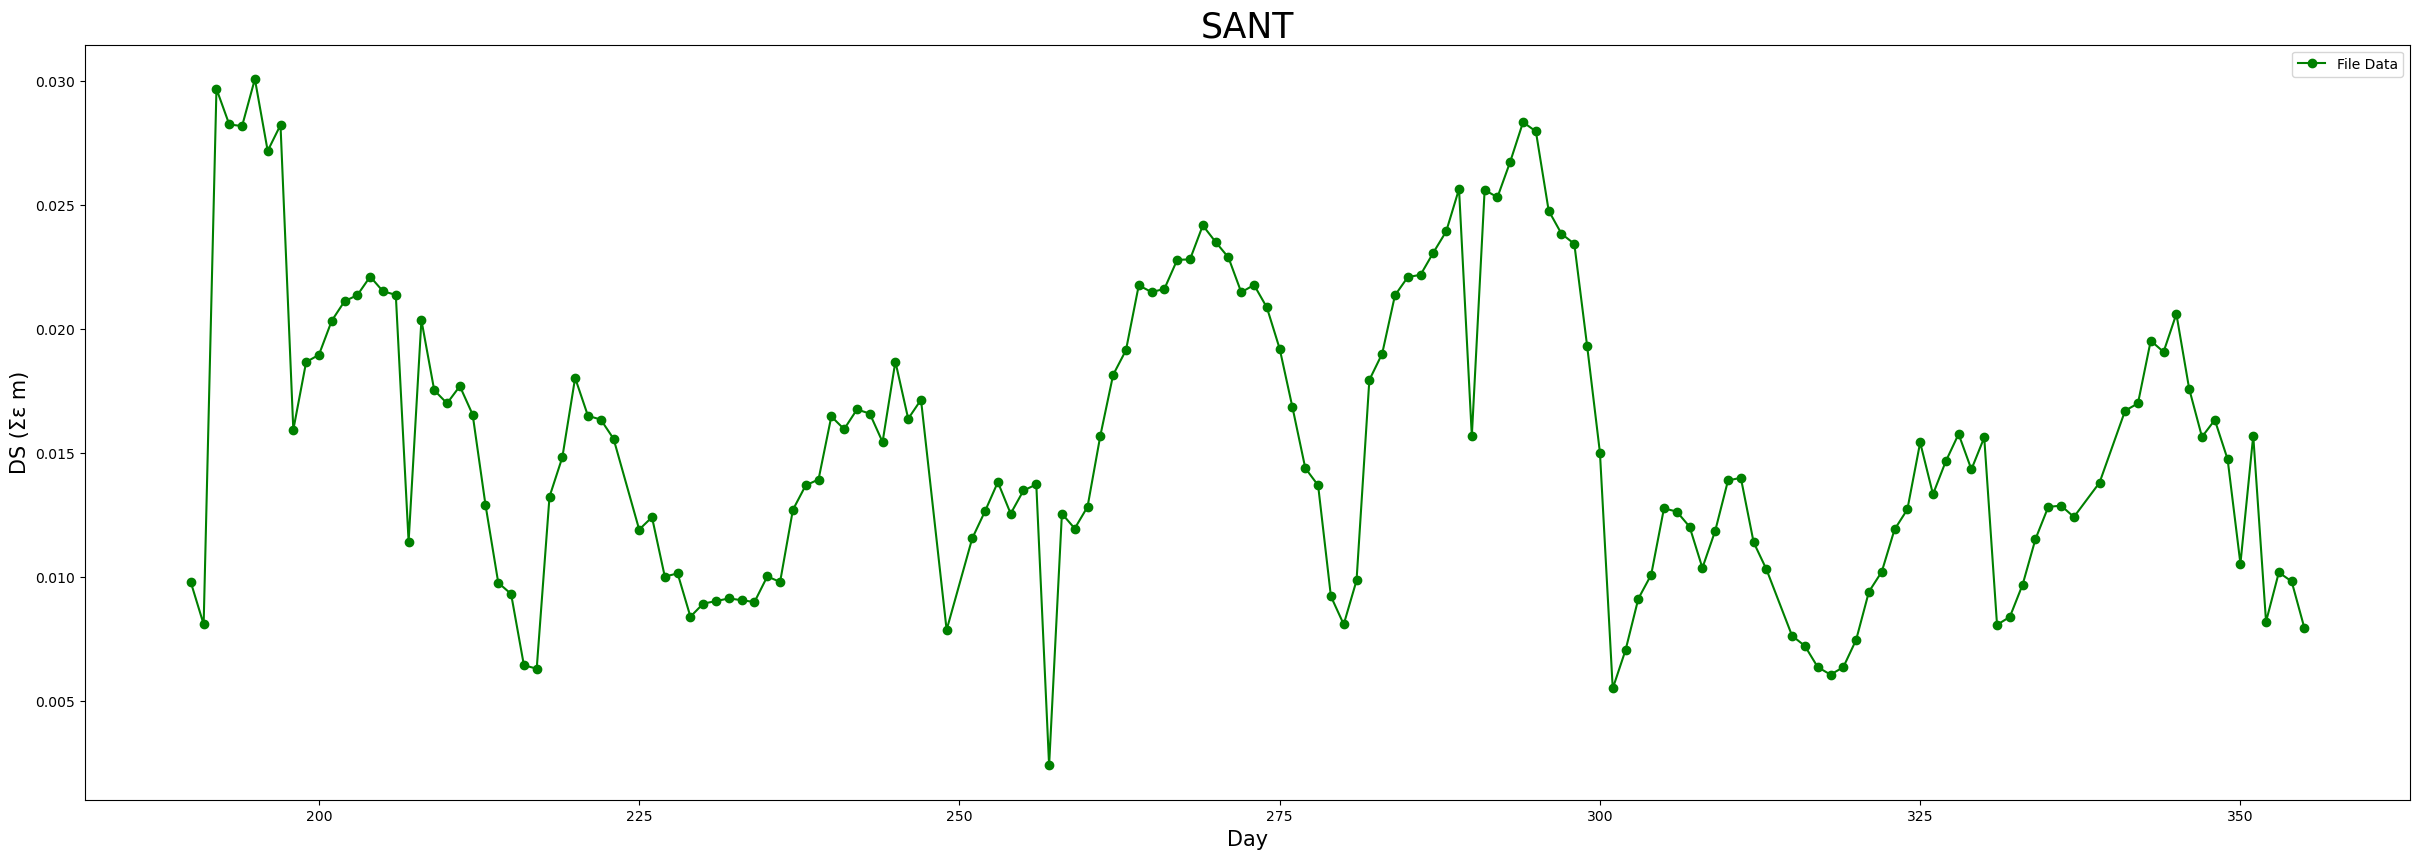

In [13]:
figure(figsize=(30, 10), dpi=100)
# plotting the points
plt.plot(Dates, SANT, 'go-', label = 'File Data')
 
# naming the x axis
plt.xlabel('Day', fontsize = 15)
# naming the y axis
plt.ylabel('DS (Σε m)', fontsize = 15)
# giving a title to my graph
plt.title('SANT' , fontsize = 25)

#plt.xticks(Date2, Date)

plt.legend()
 
# function to show the plot
plt.show()

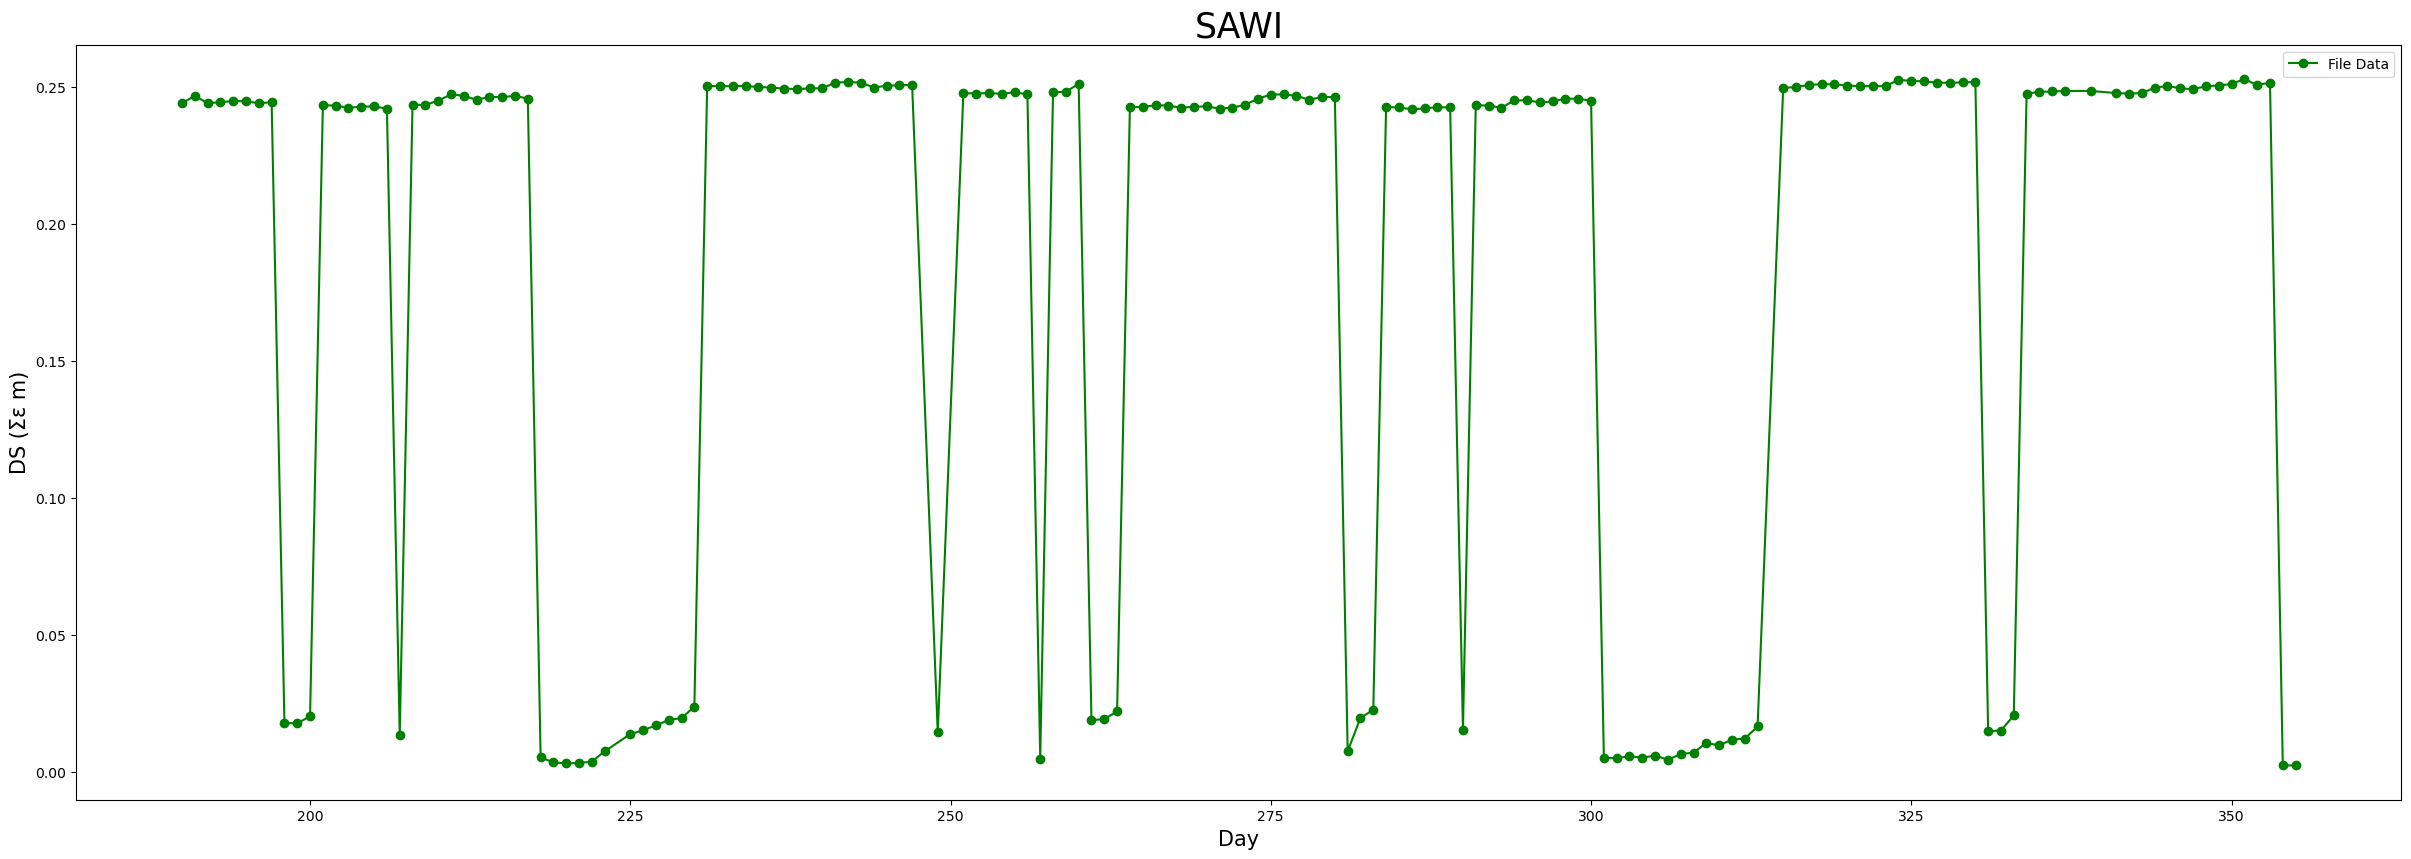

In [14]:
figure(figsize=(30, 10), dpi=100)
# plotting the points
plt.plot(Dates, SAWI, 'go-', label = 'File Data')
 
# naming the x axis
plt.xlabel('Day', fontsize = 15)
# naming the y axis
plt.ylabel('DS (Σε m)', fontsize = 15)
# giving a title to my graph
plt.title('SAWI' , fontsize = 25)

#plt.xticks(Date2, Date)

plt.legend()
 
# function to show the plot
plt.show()